<a href="https://colab.research.google.com/github/nandaee14/Smart-Power-Consumption/blob/main/EE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

#LOADING DATASET
import pandas as pd
df=pd.read_csv('powerconsumption.csv.zip')

#getting info about the imported file
print(df.head(5))


#checking name of all the columns
print(df.columns)

print(df['Datetime'])   #--->date and time both are in same column


#creating a new column for date
df['date']=None

#creating a new column for time
df['time']=None

#splitting date and time
date_list=[]
time_list=[]

for i in range(len(df)):
  dtt=df.loc[i,'Datetime']
  dtt_parts= dtt.split(' ')
  date_list.append(dtt_parts[0])
  time_list.append(dtt_parts[1])

df['date']=date_list
df['time']=time_list

print(df[['Datetime','time','date']])


#creating column for year moth and day
df['year']=None
df['month']=None
df['day']=None

#converting into year month and day as its a string for now
day_list=[]
month_list=[]
year_list=[]
for i in range(len(df)):
  dt1=df.loc[i,'date']
  dt1_parts=dt1.split('/')
  day_list.append(int(dt1_parts[1]))
  month_list.append(int(dt1_parts[0]))
  year_list.append(int(dt1_parts[2]))

#adding info into columns I created

df['day']=day_list
df['month']=month_list
df['year']=year_list



print(df.tail(20))  #chekcing


#EXTRACTING HOUR FROM TIME
df['hour']=None
hour_list=[]
for t in range(len(df)):
  dt2=df.loc[t,'time']
  dt2_parts=dt2.split(':')
  hour_list.append(int(dt2_parts[0]))

df['hour']=hour_list

print(df.head(20))


#MAKING A TOTAL POWER

df['Total_power']=df['PowerConsumption_Zone1']+df['PowerConsumption_Zone2']+df['PowerConsumption_Zone3']
print(df)


print(df.isnull().sum())   #checking for null dataset------> no null data detected






        Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             18899.27711  
4     

          date   Total_power
0     1/1/2017  9.226342e+06
1    1/10/2017  9.891922e+06
2    1/11/2017  9.659920e+06
3    1/12/2017  9.996563e+06
4    1/13/2017  9.798248e+06
..         ...           ...
359   9/5/2017  9.855758e+06
360   9/6/2017  9.959440e+06
361   9/7/2017  1.037797e+07
362   9/8/2017  1.039164e+07
363   9/9/2017  1.009403e+07

[364 rows x 2 columns]
          date   Total_power
0     1/1/2017  9.226342e+06
1    1/10/2017  9.891922e+06
2    1/11/2017  9.659920e+06
3    1/12/2017  9.996563e+06
4    1/13/2017  9.798248e+06
..         ...           ...
359   9/5/2017  9.855758e+06
360   9/6/2017  9.959440e+06
361   9/7/2017  1.037797e+07
362   9/8/2017  1.039164e+07
363   9/9/2017  1.009403e+07

[364 rows x 2 columns]


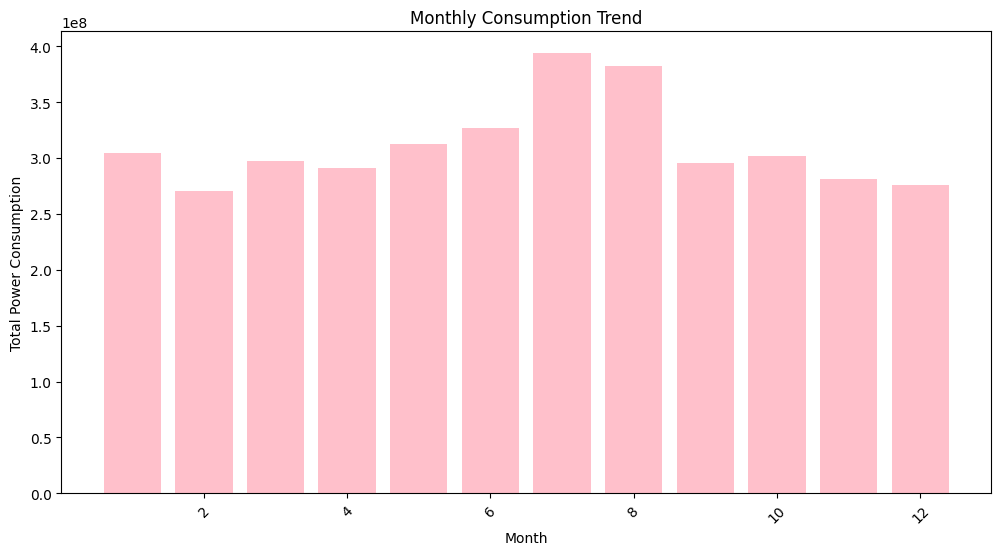

In [3]:
#EFFORT TO PLOT


#making a daily consumption trend
daily=df.groupby('date')['Total_power']
df_daily=daily.sum().reset_index()
print(df_daily)
print(df_daily)#

#making a monthly consumption trend
monthly=df.groupby('month')['Total_power']
df_monthly=monthly.sum().reset_index()
# print(df_monthly)



#making an hourly consumption Trend
hourly=df.groupby('hour')['Total_power']
df_hourly=hourly.sum().reset_index()
# print(df_hourly)

#making weekly consumption trend

df['date']=pd.to_datetime(df['date'])
df['weekdays']=df['date'].dt.day_name()  #--tell weekday of date

weekly=df.groupby('weekdays')['Total_power']
df_weekly=weekly.sum().reset_index()
# print(df_weekly)   #---- alphabetical order

df_weekly_new=df_weekly.reindex([1,5,6,4,0,2,3])
df_weekly_new=df_weekly_new.reset_index(drop=True) #drop true because we dont want previous index to show
# print(df_weekly_new)

import matplotlib.pyplot as plt
#Monthly Plotting
plt.figure(figsize=(12,6))
# df_monthly['month']=df_monthly['month'].map(1:['January'],2:['February'],3:['March'],4:['April'],5:['May'],6:['June'],7:['July'],8:['August'],9:['September'],10:['October'],11:['November'],12:['December'])
plt.bar(df_monthly['month'],df_monthly['Total_power'],color='pink')
plt.title('Monthly Consumption Trend')
plt.xlabel('Month')
plt.ylabel('Total Power Consumption')
plt.xticks(rotation=45)
plt.show()


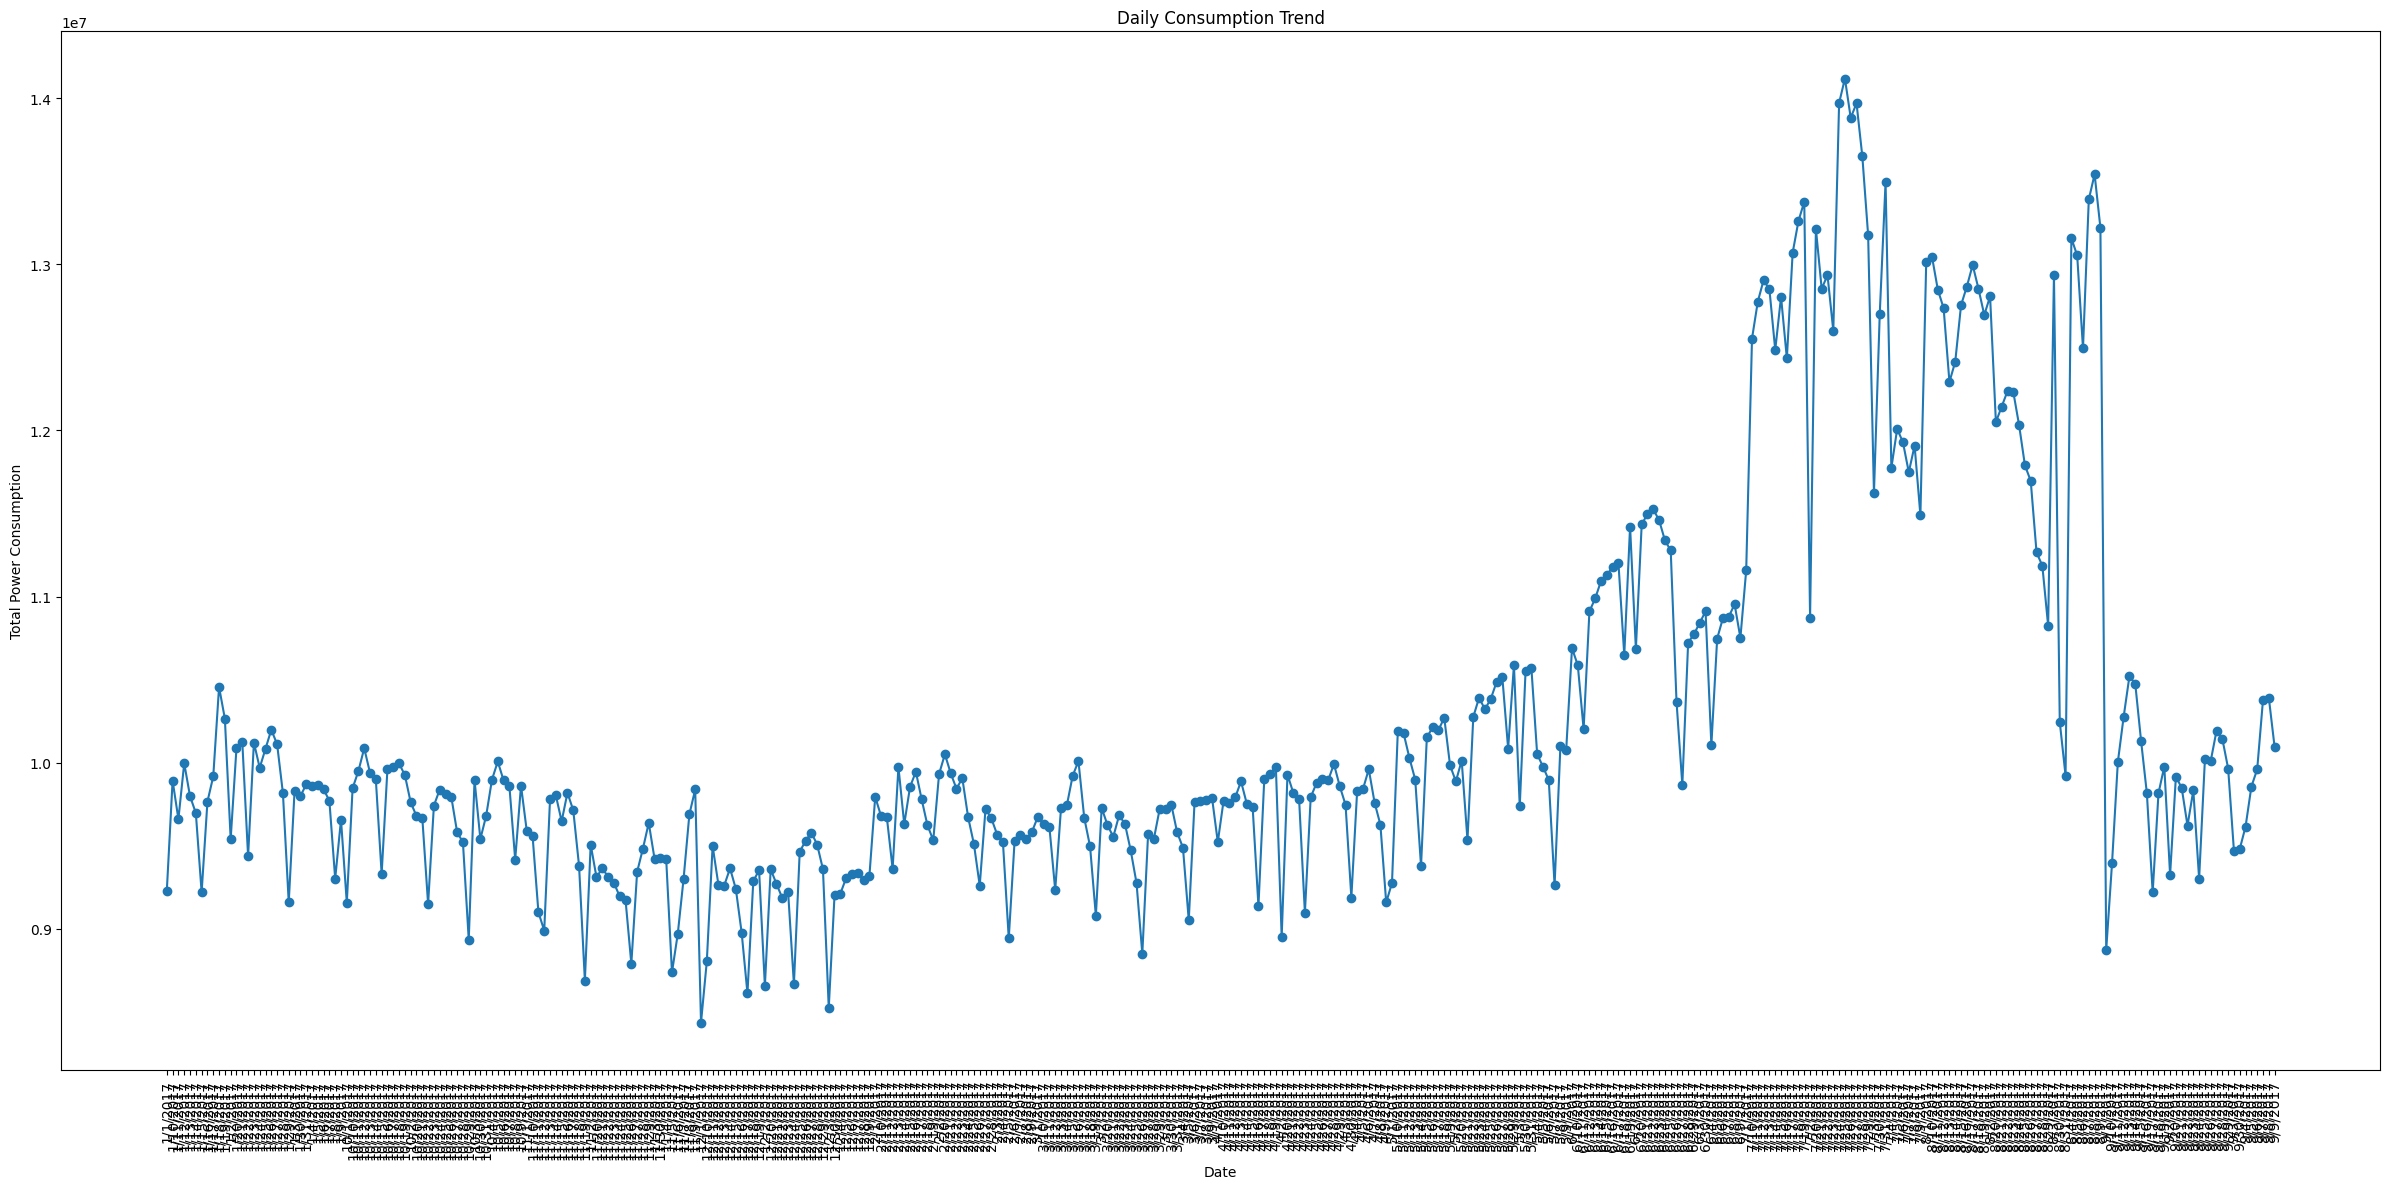

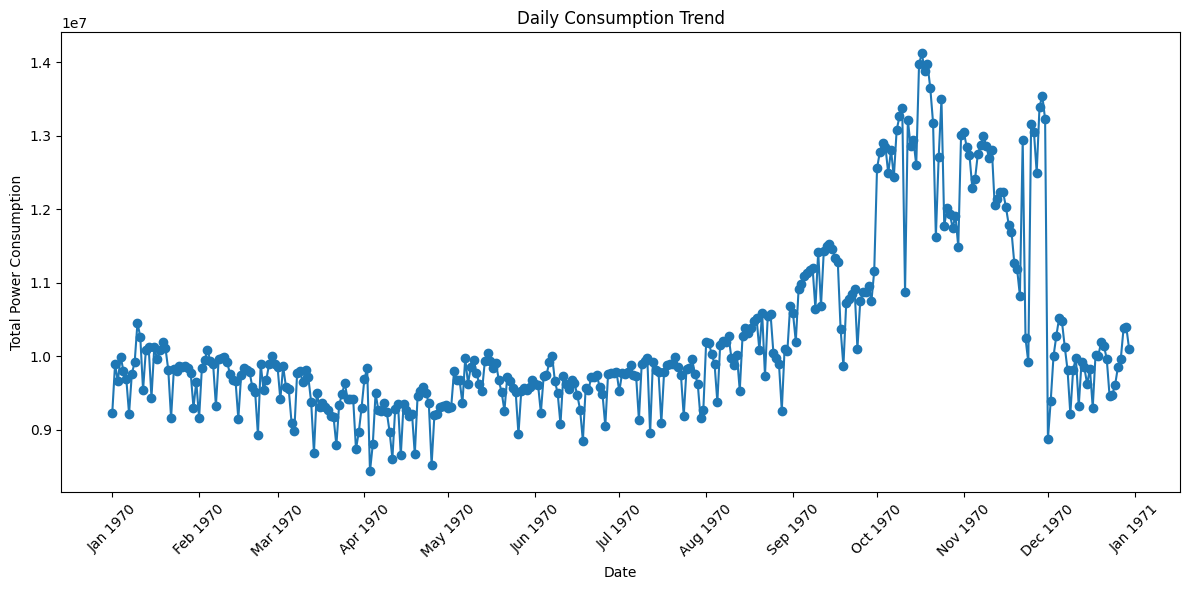

In [4]:
# FINALLY PLOTTING  Daily Analysis
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(24,12))
plt.plot(df_daily['date'],df_daily['Total_power'],marker='o')
plt.title("Daily Consumption Trend")

plt.xlabel('Date')
plt.ylabel("Total Power Consumption")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

import matplotlib.dates as mdates
fig,ax =plt.subplots(figsize=(12,6))
ax.plot(df_daily['date'],df_daily['Total_power'],marker='o')
ax.set_title("Daily Consumption Trend")
ax.set_xlabel('Date')
ax.set_ylabel('Total Power Consumption')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


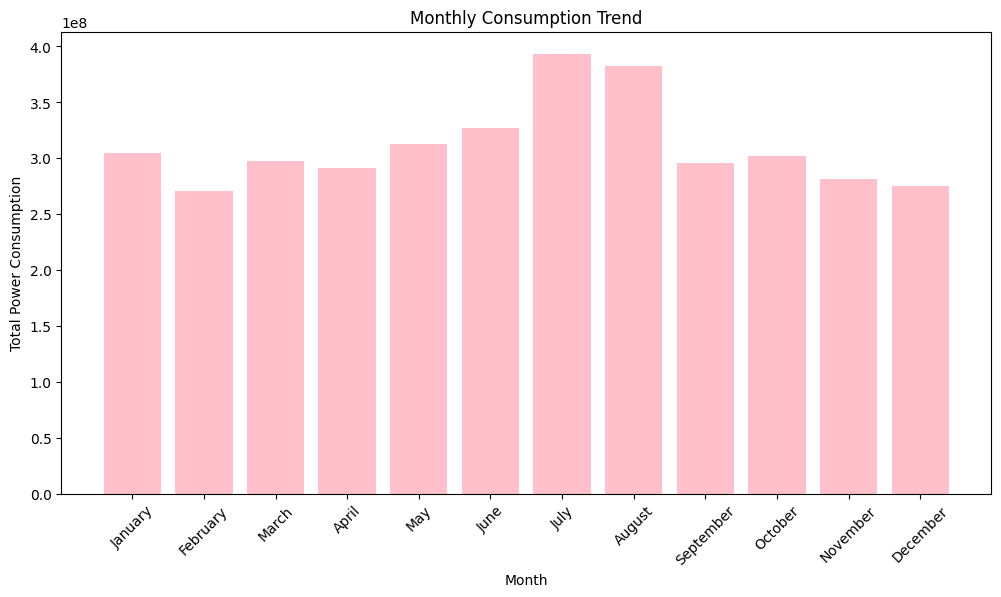

In [5]:
#DOING MONTHLY ANALYSIS

plt.figure(figsize=(12,6))
df_monthly['month']=df_monthly['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
plt.bar(df_monthly['month'],df_monthly['Total_power'],color='pink')
plt.title('Monthly Consumption Trend')
plt.xlabel('Month')
plt.ylabel('Total Power Consumption')
plt.xticks(rotation=45)
plt.show()

    season   Total_power
0   Summer  9.306656e+08
1   autumn  5.828451e+08
2  monsoon  1.072271e+09
3   spring  2.971274e+08
4   winter  8.503097e+08


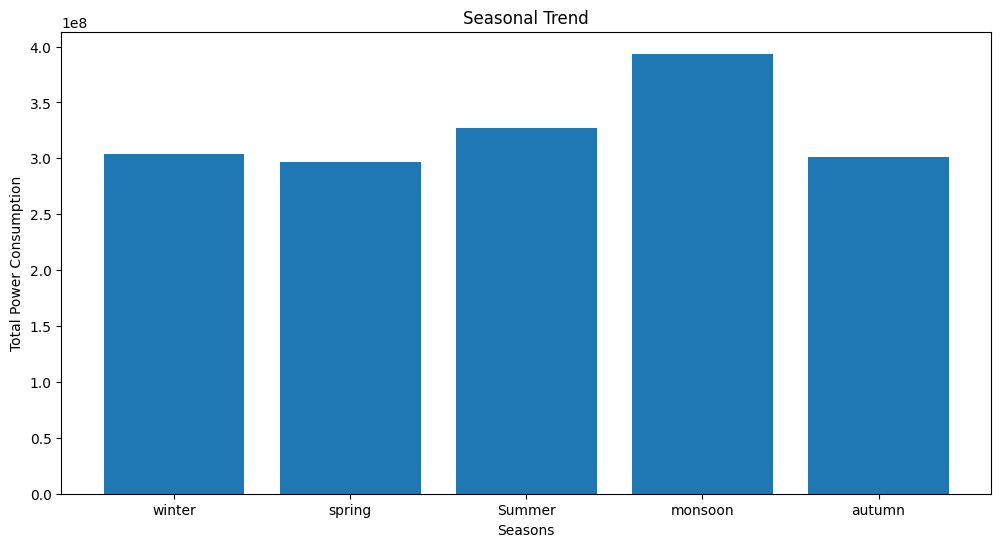

INSIGHTS ARE-
Highest power consumption in MONSOON
Second highest in SUMMERS
lowest in autumn


In [6]:
# SEASONAL TREND
df_monthly['month_number']=[1,2,3,4,5,6,7,8,9,10,11,12]
# print(df_monthly)
def get_season(month_number):
    if month_number in [12,1,2]:
      return "winter"
    elif month_number in [3]:
      return "spring"
    elif month_number in [4,5,6]:
      return 'Summer'
    elif month_number in [7,8,9]:
      return "monsoon"
    elif month_number in [10,11]:
      return "autumn"

df_monthly['season']=df_monthly['month_number'].apply(get_season)
df_seasonal=df_monthly.groupby('season')['Total_power'].sum().reset_index()
print(df_seasonal)

plt.figure(figsize=(12,6))

plt.bar(df_monthly['season'],df_monthly['Total_power'])
plt.xlabel('Seasons')
plt.ylabel('Total Power Consumption')
plt.title('Seasonal Trend')
plt.show()
print('INSIGHTS ARE-\nHighest power consumption in MONSOON')
print('Second highest in SUMMERS')
print('lowest in autumn')

     weekday   Total_power
0     Sunday  5.070446e+08
1     Monday  5.369237e+08
2    Tuesday  5.396101e+08
3  Wednesday  5.417607e+08
4   Thursday  5.431147e+08
5     Friday  5.342389e+08
6   Saturday  5.305261e+08


Text(0.5, -0.05, 'The weekday-wise analysis shows minimal variation in daily power consumption, indicating that the major portion of the load is stable and not significantly impacted by weekday-weekend cycles.\n This implies a steady base demand, typical of residential or essential services-driven grids')

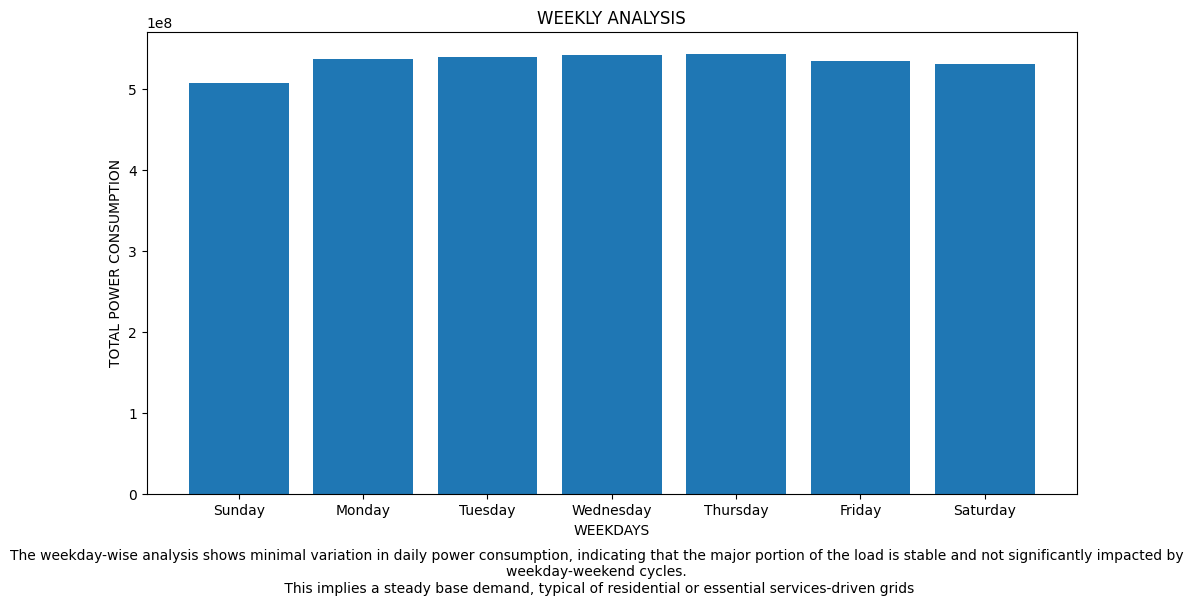

In [7]:
#WEEKLY ANALYSIS
df['date']=pd.to_datetime(df['date'])
df['weekday']=df['date'].dt.day_name()
# print(df[['day','weekday']].head(20))
df_weekday=df.groupby('weekday')['Total_power'].sum().reset_index()

#making them in order
df_weekday_new=df_weekday.reindex([3,1,5,6,4,0,2])
df_weekday_new=df_weekday_new.reset_index(drop=True)
print(df_weekday_new)
plt.figure(figsize=(12,6))
plt.bar(df_weekday_new['weekday'],df_weekday_new['Total_power'],)
plt.title('WEEKLY ANALYSIS')
plt.xlabel('WEEKDAYS')
plt.ylabel('TOTAL POWER CONSUMPTION')
plt.figtext(0.5,-0.05,'The weekday-wise analysis shows minimal variation in daily power consumption, indicating that the major portion of the load is stable and not significantly impacted by weekday-weekend cycles.\n This implies a steady base demand, typical of residential or essential services-driven grids',ha='center',fontsize=10,wrap=True)



Text(0.5, -0.1, 'OBSERVAVTION :- \n Temperature and Total_power are highly correlated with a positive value of 0.49 \n WindSpeed is weakly correlated as compared to temperature \n Humidity seems to be negatively correlated ')

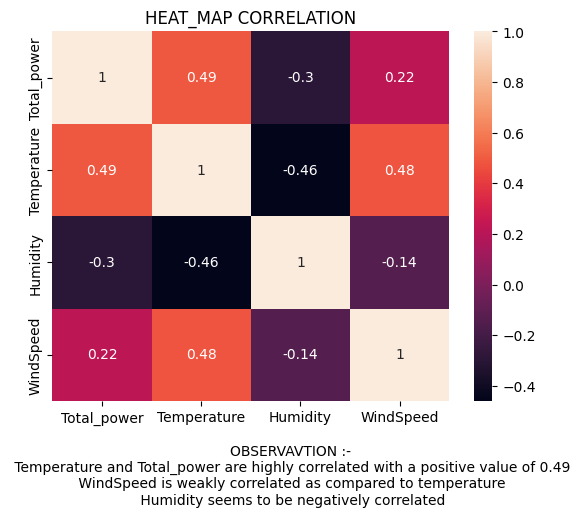

In [8]:
#CORRELATION CHECK TO BUILD AI MODEL
import seaborn as sns
sns.heatmap(df[['Total_power','Temperature','Humidity','WindSpeed']].corr(),annot=True)
plt.title('HEAT_MAP CORRELATION')
plt.figtext(0.5,-0.1,'OBSERVAVTION :- \n Temperature and Total_power are highly correlated with a positive value of 0.49 \n WindSpeed is weakly correlated as compared to temperature \n Humidity seems to be negatively correlated ',ha='center',fontsize=10,wrap=True )

In [9]:
# CREATING A PREDICTING MODEL
from matplotlib import pyplot as pyplot
import pandas as pd
X=df[['Temperature','Humidity','hour',]]
Y=df['Total_power']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model=RandomForestRegressor()
model.fit(X_train_scaled,Y_train)

#doing predictions
Y_predicted=model.predict(X_test_scaled)
print(Y_predicted)

#FOR CHECKING ACCURACY

from sklearn.metrics import mean_squared_error,r2_score
print("MSE:",mean_squared_error(Y_test,Y_predicted))
print("R2 Score is",r2_score(Y_test,Y_predicted))

[70881.8068163 77670.9850114 69899.0686353 ... 90972.2530303 59101.4006037
 92126.388492 ]
MSE: 28289608.935438823
R2 Score is 0.9030088649231035


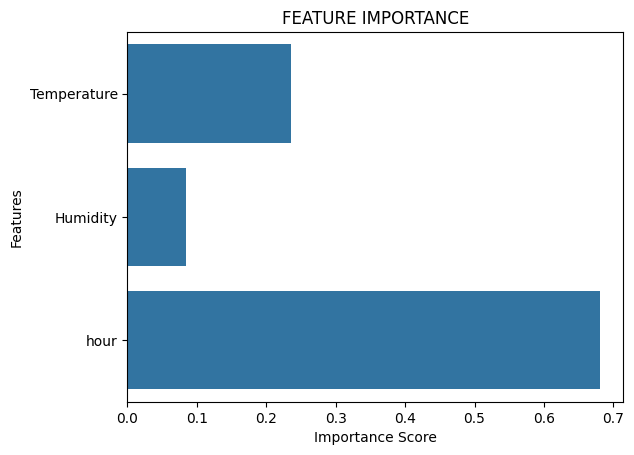

In [ ]:
#FEATURE IMPORTANCE PLOT

import seaborn as sns
feature_importance=model.feature_importances_
features=X.columns

sns.barplot(x=feature_importance,y=features)
plt.title('FEATURE IMPORTANCE')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

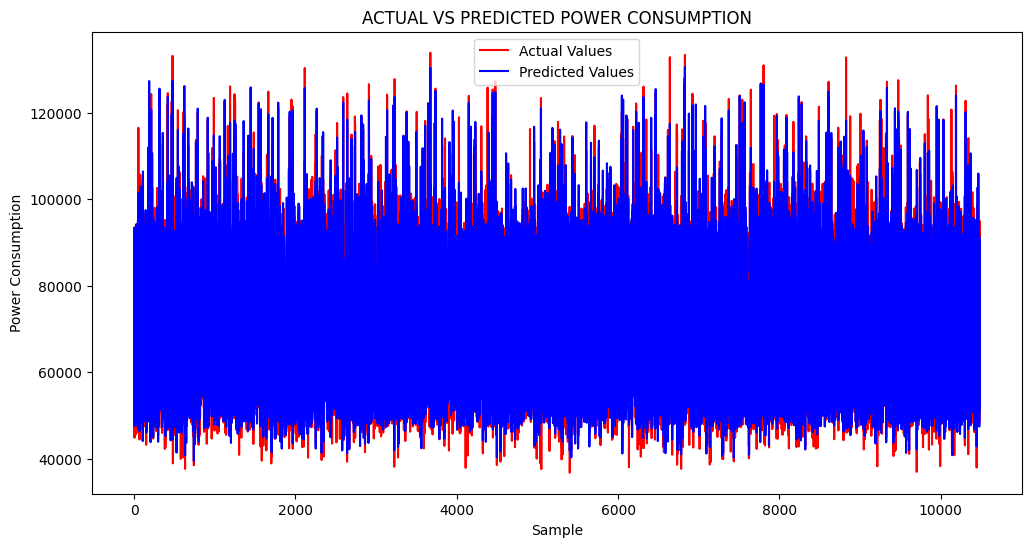

In [ ]:
#ACTUAL VS PREDICTED PLOT
plt.figure(figsize=(12,6))
plt.plot(Y_test.values,label='Actual Values',color='red')
plt.plot(Y_predicted,label="Predicted Values",color='blue')#already a numpy array
plt.legend()
plt.title('ACTUAL VS PREDICTED POWER CONSUMPTION')
plt.xlabel('Sample')
plt.ylabel('Power Consumption')
plt.show()

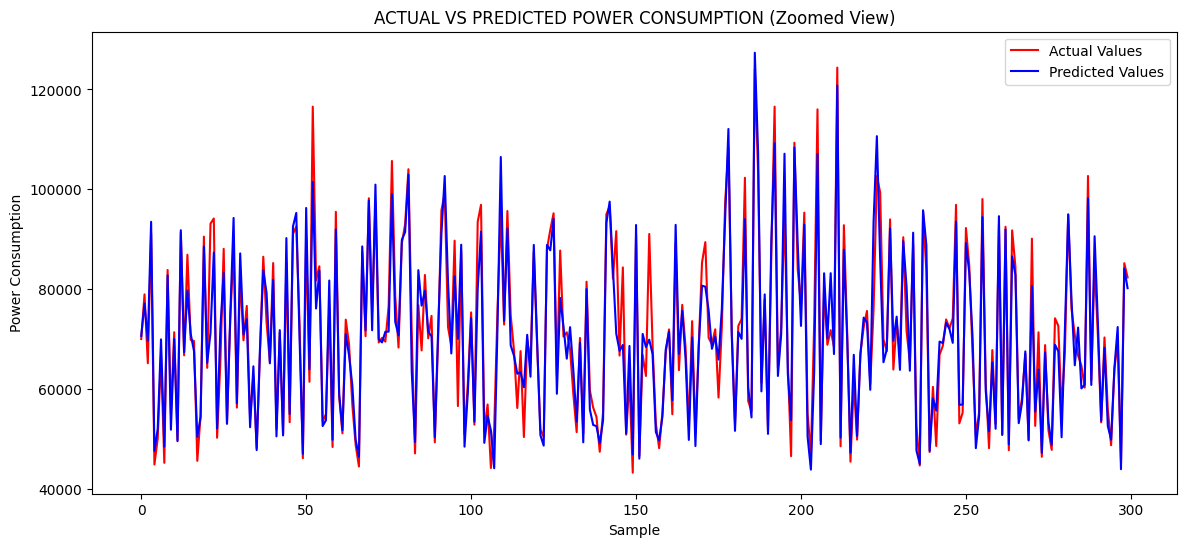

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Y_test.values[:300], label='Actual Values', color='red')
plt.plot(Y_predicted[:300], label='Predicted Values', color='blue')
plt.title("ACTUAL VS PREDICTED POWER CONSUMPTION (Zoomed View)")
plt.xlabel("Sample")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()


TypeError: text() missing 2 required positional arguments: 'y' and 's'

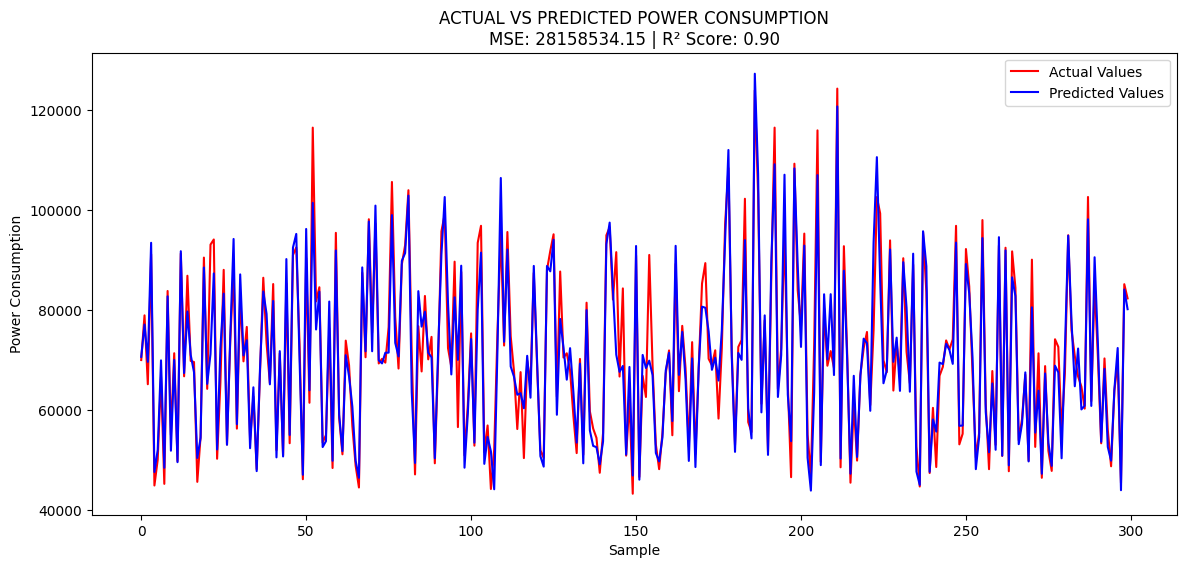

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_predicted)
r2 = r2_score(Y_test, Y_predicted)

plt.figure(figsize=(14,6))
plt.plot(Y_test.values[:300], label='Actual Values', color='red')
plt.plot(Y_predicted[:300], label='Predicted Values', color='blue')
plt.title(f"ACTUAL VS PREDICTED POWER CONSUMPTION\nMSE: {mse:.2f} | R² Score: {r2:.2f}")
plt.xlabel("Sample")
plt.ylabel("Power Consumption")
plt.legend()
plt.text(0.)
plt.show()


    hour   Total_power
0      0  1.497493e+08
1      1  1.360663e+08
2      2  1.288646e+08
3      3  1.236784e+08
4      4  1.199643e+08
5      5  1.127793e+08
6      6  1.096147e+08
7      7  1.123129e+08
8      8  1.242843e+08
9      9  1.394361e+08
10    10  1.524930e+08
11    11  1.613529e+08
12    12  1.650849e+08
13    13  1.658986e+08
14    14  1.641470e+08
15    15  1.611766e+08
16    16  1.587577e+08
17    17  1.677102e+08
18    18  1.881315e+08
19    19  2.088890e+08
20    20  2.141130e+08
21    21  2.066760e+08
22    22  1.919357e+08
23    23  1.701025e+08
    hour   Total_power
6      6  1.096147e+08
7      7  1.123129e+08
5      5  1.127793e+08
4      4  1.199643e+08
3      3  1.236784e+08
8      8  1.242843e+08
2      2  1.288646e+08
1      1  1.360663e+08
9      9  1.394361e+08
0      0  1.497493e+08
10    10  1.524930e+08
16    16  1.587577e+08
15    15  1.611766e+08
11    11  1.613529e+08
14    14  1.641470e+08
12    12  1.650849e+08
13    13  1.658986e+08
17    17  1

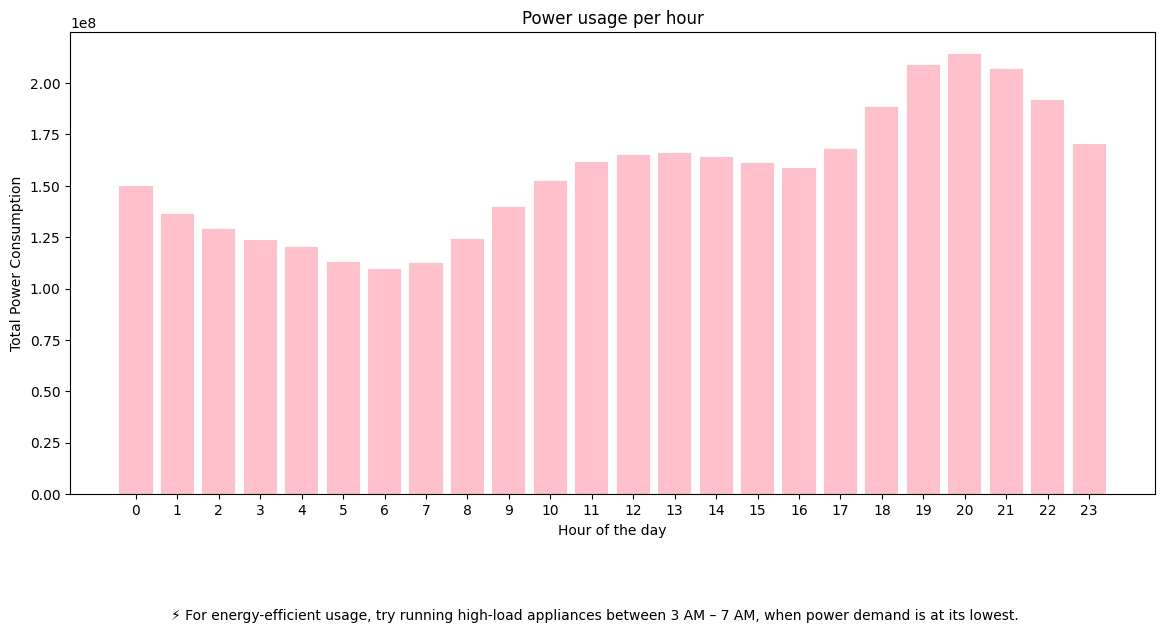

In [ ]:
#DETEMINING OPTIMAL USAGE HOURS
print(df_hourly)
df_hours=df_hourly.sort_values(by='Total_power')
print(df_hours)
best_3_hours=df_hours.head(3)
print(best_3_hours)

#plotting figure to show best hours for usage
plt.figure(figsize=(14,6))
plt.bar(df_hours['hour'],df_hours['Total_power'],color='pink')
plt.title('Power usage per hour')
plt.xlabel('Hour of the day')
plt.ylabel('Total Power Consumption')
plt.xticks(range(0,24))
plt.figtext(0.5,-0.1,'⚡ For energy-efficient usage, try running high-load appliances between 3 AM – 7 AM, when power demand is at its lowest.',ha='center',fontsize=10,wrap=True)
plt.show()


In [ ]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8276fq8/3szw4vzl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8276fq8/8bc7b8b4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81757', 'data', 'file=/tmp/tmpl8276fq8/3szw4vzl.json', 'init=/tmp/tmpl8276fq8/8bc7b8b4.json', 'output', 'file=/tmp/tmpl8276fq8/prophet_modelwzcb51vc/prophet_model-20250805172540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:25:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:25:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat
0   2017-01-01  9.283852e+06
1   2017-01-02  9.858324e+06
2   2017-01-03  9.909887e+06
3   2017-01-04  9.950850e+06
4   2017-01-05  9.976762e+06
..         ...           ...
389 2018-01-25  9.021171e+06
390 2018-01-26  8.844111e+06
391 2018-01-27  8.766341e+06
392 2018-01-28  8.294130e+06
393 2018-01-29  8.862549e+06

[394 rows x 2 columns]


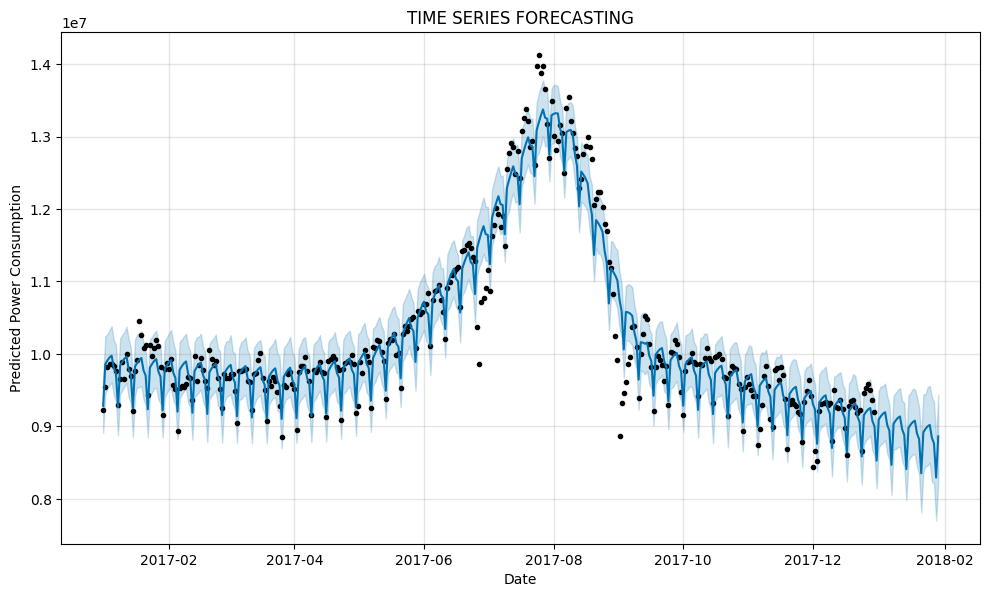

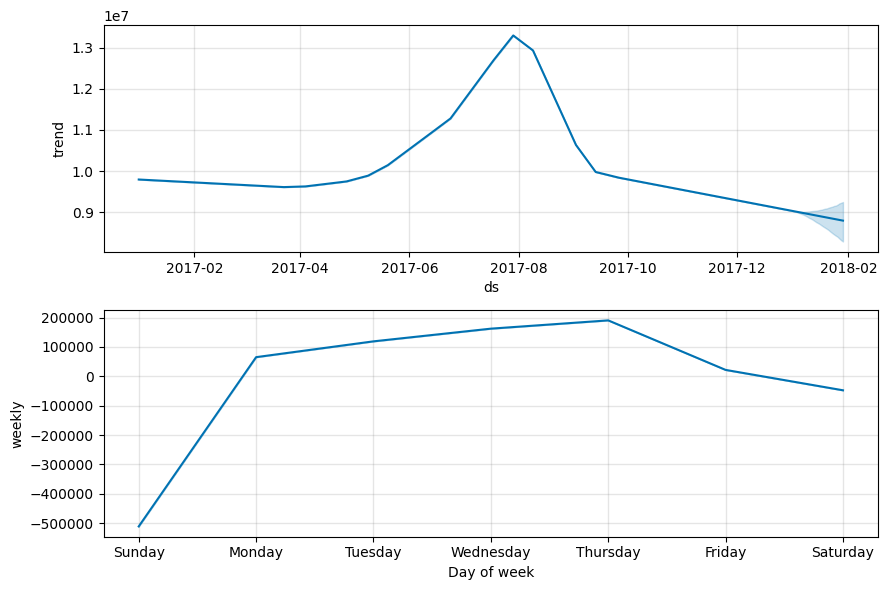

            ds      yhat
0   2017-01-01  9.283852
1   2017-01-02  9.858324
2   2017-01-03  9.909887
3   2017-01-04  9.950850
4   2017-01-05  9.976762
..         ...       ...
389 2018-01-25  9.021171
390 2018-01-26  8.844111
391 2018-01-27  8.766341
392 2018-01-28  8.294130
393 2018-01-29  8.862549

[394 rows x 2 columns]
            ds      yhat   alert
0   2017-01-01  9.283852  ✅ Safe
1   2017-01-02  9.858324  ✅ Safe
2   2017-01-03  9.909887  ✅ Safe
3   2017-01-04  9.950850  ✅ Safe
4   2017-01-05  9.976762  ✅ Safe
..         ...       ...     ...
389 2018-01-25  9.021171  ✅ Safe
390 2018-01-26  8.844111  ✅ Safe
391 2018-01-27  8.766341  ✅ Safe
392 2018-01-28  8.294130  ✅ Safe
393 2018-01-29  8.862549  ✅ Safe

[394 rows x 3 columns]


/tmp/ipython-input-1673393153.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_df['yhat']=forecast_df['yhat']/1000000
/tmp/ipython-input-1673393153.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_df['alert'] = alerts


In [ ]:

#TIME SERIES FORECASTING

df['date']=pd.to_datetime(df['date'])
daily_df=df.groupby('date')['Total_power'].sum().reset_index()
daily_df.columns=['ds','y']
from prophet import Prophet
model=Prophet()
model.fit(daily_df)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
forecast_df=forecast[['ds','yhat']]
print(forecast_df)
model.plot(forecast)
plt.title('TIME SERIES FORECASTING')
plt.xlabel('Date')
plt.ylabel('Predicted Power Consumption')
plt.show()
model.plot_components(forecast)
plt.show()





forecast_df['yhat']=forecast_df['yhat']/1000000
print(forecast_df)
THRESHOLD = 11
alerts = []

for power in forecast_df['yhat']:
    if power > THRESHOLD:
        alerts.append('⚠️ Delay usage!')
    else:
        alerts.append('✅ Safe')

forecast_df['alert'] = alerts
print(forecast_df)

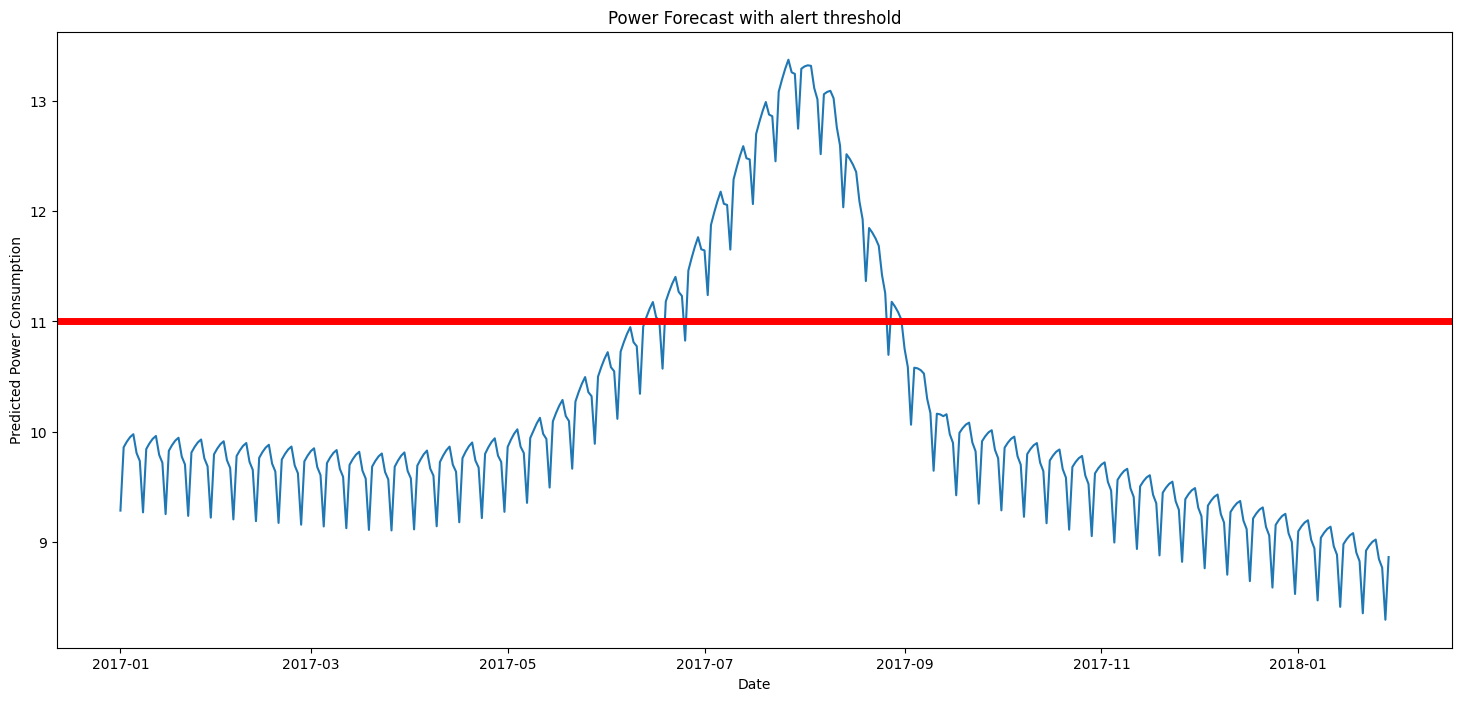

In [ ]:
#PLOTTING GRAPH
plt.figure(figsize=(18,8))
plt.plot(forecast_df['ds'],forecast_df['yhat'],label='Forecasted Power Consumption')
plt.xlabel('Date')
plt.axhline(THRESHOLD,color='red',linestyle='-',linewidth=5)

plt.ylabel('Predicted Power Consumption')
plt.title('Power Forecast with alert threshold')
plt.show()


In [ ]:
print(df_daily)

          date   Total_power
0     1/1/2017  9.226342e+06
1    1/10/2017  9.891922e+06
2    1/11/2017  9.659920e+06
3    1/12/2017  9.996563e+06
4    1/13/2017  9.798248e+06
..         ...           ...
359   9/5/2017  9.855758e+06
360   9/6/2017  9.959440e+06
361   9/7/2017  1.037797e+07
362   9/8/2017  1.039164e+07
363   9/9/2017  1.009403e+07

[364 rows x 2 columns]


          date  Total_power
0     1/1/2017     9.226342
1    1/10/2017     9.891922
2    1/11/2017     9.659920
3    1/12/2017     9.996563
4    1/13/2017     9.798248
..         ...          ...
359   9/5/2017     9.855758
360   9/6/2017     9.959440
361   9/7/2017    10.377965
362   9/8/2017    10.391639
363   9/9/2017    10.094031

[364 rows x 2 columns]
          date  Total_power   alert
0     1/1/2017     9.226342  ✅ Safe
1    1/10/2017     9.891922  ✅ Safe
2    1/11/2017     9.659920  ✅ Safe
3    1/12/2017     9.996563  ✅ Safe
4    1/13/2017     9.798248  ✅ Safe
..         ...          ...     ...
359   9/5/2017     9.855758  ✅ Safe
360   9/6/2017     9.959440  ✅ Safe
361   9/7/2017    10.377965  ✅ Safe
362   9/8/2017    10.391639  ✅ Safe
363   9/9/2017    10.094031  ✅ Safe

[364 rows x 3 columns]


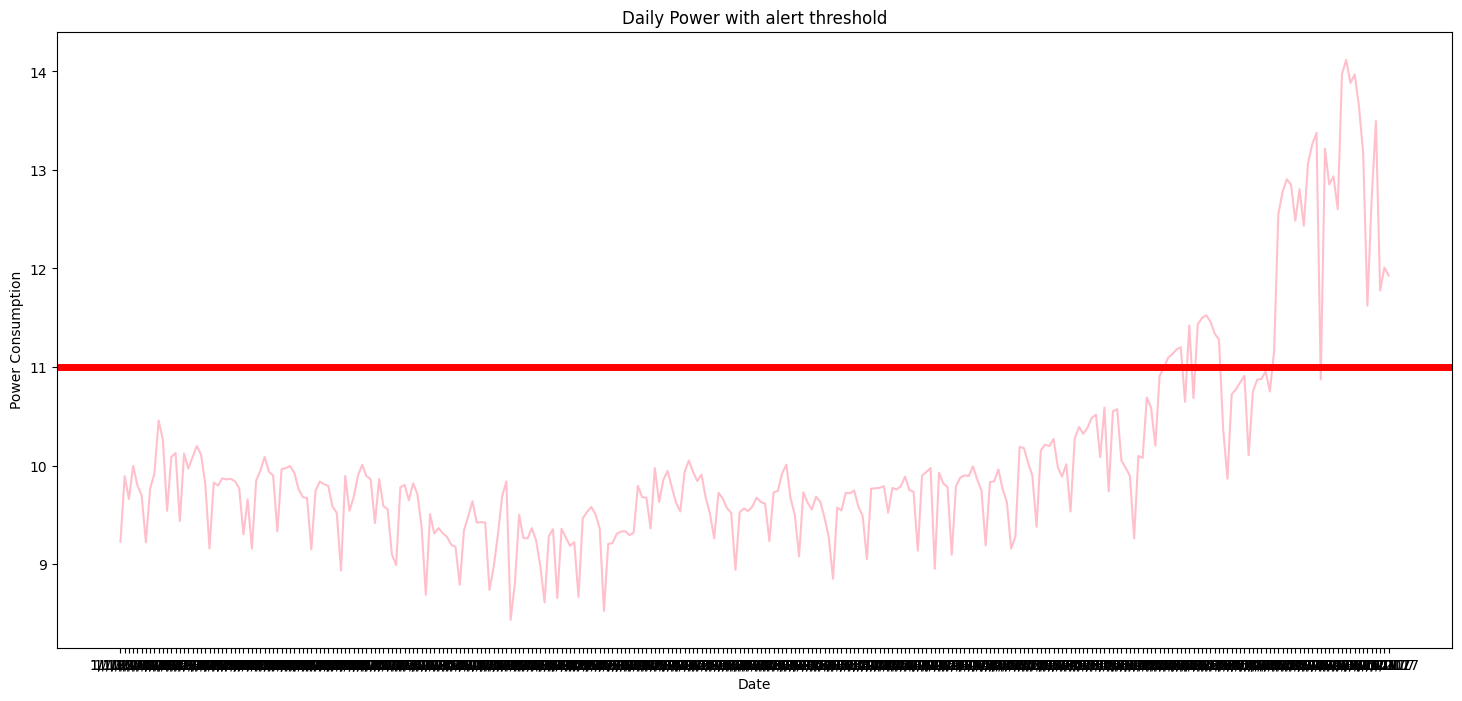